In [1]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

# Libraries needed for web-scraping:
!pip install kora -q
!pip install Pillow
from kora.selenium import wd as webdriver
from pathlib import Path

     |████████████████████████████████| 720 kB 27.7 MB/s 
     |████████████████████████████████| 1.2 MB 20.1 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 188 kB 55.8 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 304 kB/s 
     |████████████████████████████████| 57 kB 3.5 MB/s 


In [2]:
dest = '/content/DataML'
path = untar_data (URLs.PETS, dest=dest) / 'images'

# def is_cat(x):
#      return x[0].isupper() 

# dls = ImageDataLoaders.from_name_func(
#     path=path,
#     fnames=get_image_files(path),        
#     valid_pct=0.2, seed=42,
#     label_func=is_cat,
#     item_tfms=Resize(224)
# )

In [3]:
import shutil
def catagorize_files(input_path, dest_path):
    if not os.path.exists(dest_path):
        os.mkdir(dest_path)
        os.mkdir(dest_path / 'Dog')
        os.mkdir(dest_path / 'Cat')
        # os.mkdir(dest_path / 'Keanu')
    files = input_path.ls()
    for f_ind in range(len(files)):
        if files[f_ind].name[0].isupper():
            shutil.copy(files[f_ind], dest_path/'Cat'/files[f_ind].name)
        else:
            shutil.copy(files[f_ind], dest_path/'Dog'/files[f_ind].name)
            

In [4]:
dest_path = Path('/content/DataML/my_images')
catagorize_files(path, dest_path)

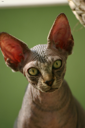

In [5]:
img_path = (dest_path/'Cat').ls()[34]
img = PILImage.create(img_path)
# show_image(img);
img.to_thumb(128)

We can check if it was done correctly:

In [6]:
sample_list = list((dest_path/'Cat').ls()[:10])

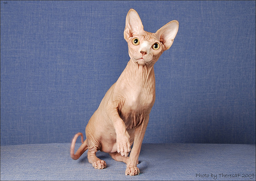

In [7]:
img = PILImage.create(sample_list[5])
# show_image(img);
img.to_thumb(256)

Now, let's add Keanu:


Import the web-scraping function

In [8]:
from kora.selenium import wd as webdriver
from pathlib import Path

In [9]:
!git clone https://github.com/spahlavian/web-scraper.git

Cloning into 'web-scraper'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [10]:
import sys
sys.path.append("/content/web-scraper")

from webScrapper import search_and_download



In [11]:
search_term = 'keanu reeves headshot'

dest_path = Path('/content/DataML/my_images')


search_and_download(
    search_term=search_term,
    wd=webdriver,
    target_path=dest_path/'Keanu',
    number_of_images=50,
    sleep_time=1)

Found: 100 search results. Extracting links from 0:100
Found: 50 image links, done!
SUCCESS - saved https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/gettyimages-1981871a-1560281723.jpg?crop=0.586xw:0.878xh;0.243xw,0.122xh&resize=640:* - as /content/DataML/my_images/Keanu/3fa23ce0b2.jpg
ERROR - Could not save https://img.huffingtonpost.com/asset/5cf8243c2100003711e6a541.jpeg?ops=scalefit_630_noupscale - cannot identify image file <_io.BytesIO object at 0x7f5920d47e30>
SUCCESS - saved https://image.tmdb.org/t/p/w185/rRdru6REr9i3WIHv2mntpcgxnoY.jpg - as /content/DataML/my_images/Keanu/7e5184949e.jpg
SUCCESS - saved https://impactingculture.com/wp-content/uploads/2019/06/Keanu-Reeves-headshot.jpg - as /content/DataML/my_images/Keanu/c6f182ea04.jpg
SUCCESS - saved https://www.cinema.com/image_lib/Keanu_Reeves_headShot.jpg - as /content/DataML/my_images/Keanu/6139287a21.jpg
SUCCESS - saved https://external-preview.redd.it/9FPBRhV0-MgksY_njHkobuJKDv0lFqkMavZw-FefYLo.jpg?auto=webp&

/content/DataML/my_images/Keanu/dba442940f.jpg


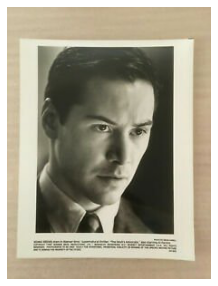

In [12]:
img_path = get_image_files(dest_path/'Keanu')[3]
print(img_path)
img = PILImage.create(img_path)
show_image(img);

In [13]:
def label_func(x): 
    return x.parent.name

dls = ImageDataLoaders.from_path_func(
    path=dest_path,
    fnames=get_image_files(dest_path),        
    valid_pct=0.2,
    seed=42,
    label_func=label_func,
    item_tfms=Resize(224)
)

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,0.265998,0.029556,0.008742,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.053157,0.020619,0.006725,01:04


In [15]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [16]:
img = PILImage.create(uploader.data[0])
prediction,_,probs = learn.predict(img)
print(f'Prediction: {prediction}')
print(probs)

IndexError: ignored

In [17]:
dls.vocab

['Cat', 'Dog', 'Keanu']